# Data Description

In Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 

They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 

They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 

The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers.

# Import Required Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [10]:
#importing dataset from github

df=pd.read_csv(r'C:\Users\booba\Downloads\Micro-Credit-Project\Micro Credit Project\Data file.csv')
df.head()

msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
0  21408I70789  272.0   3055.050000   3065.150000    220.13    260.13   
1  76462I70374  712.0  12122.000000  12124.750000   3691.26   3691.26   
2  17943I70372  535.0   1398.000000   1398.000000    900.13    900.13   
3  55773I70781  241.0     21.228000     21.228000    159.42    159.42   
4  03813I82730  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                2.0                0.0              1539              2   
1               20.0                0.0              5787              1   
2                3.0                0.0              1539              1   
3               41.0                0.0               947              0   
4                4.0                0.0              2309              7   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0          21.0             3078.0                1539.0   
1           0.0             5787.0                5787.0   
2           0.0             1539.0                1539.0   
3           0.0                0.0                   0.0   
4           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90 pcircle       pdate  label  
0                 0.0  29.000000  29.000000     UPW  20-07-2016      0  
1                 0.0   0.000000   0.000000     UPW  10-08-2016      1  
2                 0.0   0.000000   0.000000     UPW  19-08-2016      1  
3                 0.0   0.000000   0.000000     UPW  06-06-2016      1  
4                 0.0   2.333333   2.333333     UPW  22-06-2016      1

Totally, We have a 36 columns in the dataset and Label column is the target column.

In [4]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

The above code will help me to view all the columns and rows whenever is required.

# Checking Data type and Shape

In [5]:
df.dtypes

msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

In [6]:
df.shape

(209593, 36)

In [7]:
df=df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   msisdn                209593 non-null  object 
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  int64  
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  int64  
 15  

# Checking Unique Value only in doubtfull column

In [11]:
df["pcircle"].value_counts()

UPW    209593
Name: pcircle, dtype: int64

In the above data type is showig as Object but it is same circle. I think we can remove the column from the dataset.

In [11]:
df=df.drop(['msisdn','pcircle','pdate'],axis=1)
df.columns

Index(['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'label'],
      dtype='object')

We have successfully removed that (mobile num,circle,date) columns from the dataset because here no use to contain the details for upcoming step.

In [6]:
df.dtypes

aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback30               float64
payback9

In [15]:
df.shape

(209593, 33)

We have a 209593 rows and 33 columns in the dataset now.

# Checking Null Value

In [16]:
df.isnull().sum()

aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
label                   0
dtype: int64

We don't have a null value in the dataset. However, I will ensure with heatmap in next step.

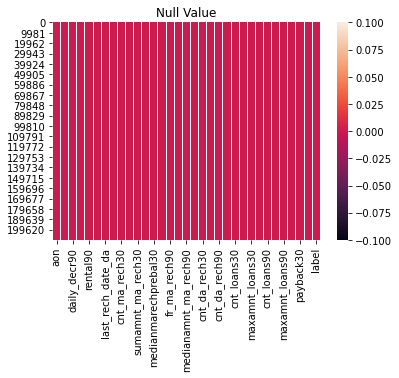

In [17]:
sns.heatmap(df.isnull())
plt.title("Null Value")
plt.show()

# Visualization of Data:

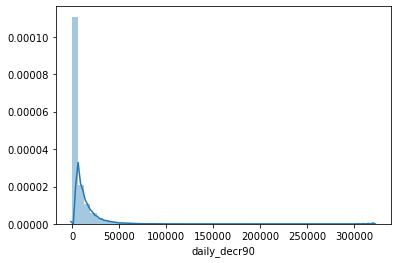

In [20]:
A=sns.distplot(df["daily_decr90"],kde=True)

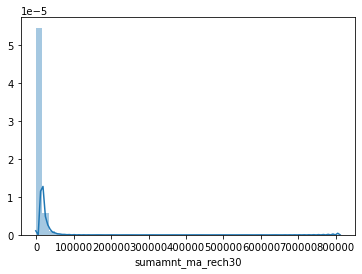

In [21]:
B=sns.distplot(df["sumamnt_ma_rech30"],kde=True)

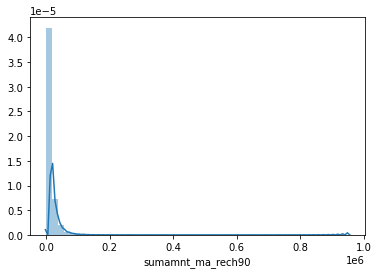

In [22]:
C=sns.distplot(df["sumamnt_ma_rech90"],kde=True)

# Describe Dataset

In [23]:
#Statistical Summary
df.describe()

aon   daily_decr30   daily_decr90       rental30  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean     8112.343445    5381.402289    6082.515068    2692.581910   
std     75696.082531    9220.623400   10918.812767    4308.586781   
min       -48.000000     -93.012667     -93.012667  -23737.140000   
25%       246.000000      42.440000      42.692000     280.420000   
50%       527.000000    1469.175667    1500.000000    1083.570000   
75%       982.000000    7244.000000    7802.790000    3356.940000   
max    999860.755200  265926.000000  320630.000000  198926.110000   

            rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
count  209593.000000       209593.00000      209593.000000     209593.000000   
mean     3483.406534         3755.84780        3712.202921       2064.452797   
std      5770.461279        53905.89223       53374.833430       2370.786034   
min    -24720.580000          -29.00000         -29.000000          0.000000   
25%       300.260000            1.00000           0.000000        770.000000   
50%      1334.000000            3.00000           0.000000       1539.000000   
75%      4201.790000            7.00000           0.000000       2309.000000   
max    200148.110000       998650.37770      999171.809400      55000.000000   

       cnt_ma_rech30   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
count  209593.000000  209593.000000      209593.000000         209593.000000   
mean        3.978057    3737.355121        7704.501157           1812.817952   
std         4.256090   53643.625172       10139.621714           2070.864620   
min         0.000000       0.000000           0.000000              0.000000   
25%         1.000000       0.000000        1540.000000            770.000000   
50%         3.000000       2.000000        4628.000000           1539.000000   
75%         5.000000       6.000000       10010.000000           1924.000000   
max       203.000000  999606.368100      810096.000000          55000.000000   

       medianmarechprebal30  cnt_ma_rech90   fr_ma_rech90  sumamnt_ma_rech90  \
count         209593.000000   209593.00000  209593.000000      209593.000000   
mean            3851.927942        6.31543       7.716780       12396.218352   
std            54006.374433        7.19347      12.590251       16857.793882   
min             -200.000000        0.00000       0.000000           0.000000   
25%               11.000000        2.00000       0.000000        2317.000000   
50%               33.900000        4.00000       2.000000        7226.000000   
75%               83.000000        8.00000       8.000000       16000.000000   
max           999479.419300      336.00000      88.000000      953036.000000   

       medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
count         209593.000000         209593.000000  209593.000000   
mean            1864.595821             92.025541     262.578110   
std             2081.680664            369.215658    4183.897978   
min                0.000000           -200.000000       0.000000   
25%              773.000000             14.600000       0.000000   
50%             1539.000000             36.000000       0.000000   
75%             1924.000000             79.310000       0.000000   
max            55000.000000          41456.500000   99914.441420   

        fr_da_rech30  cnt_da_rech90   fr_da_rech90    cnt_loans30  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean     3749.494447       0.041495       0.045712       2.758981   
std     53885.414979       0.397556       0.951386       2.554502   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       2.000000   
75%         0.000000       0.000000       0.000000       4.000000   
max    999809.240100      38.000000      64.000000      50.000000  

We have a outlier and skewness. So we will check in further step

# Correlation Checking:

In [24]:
df.corr()

aon  daily_decr30  daily_decr90  rental30  \
aon                   1.000000      0.001104      0.000374 -0.000960   
daily_decr30          0.001104      1.000000      0.977704  0.442066   
daily_decr90          0.000374      0.977704      1.000000  0.434685   
rental30             -0.000960      0.442066      0.434685  1.000000   
rental90             -0.000790      0.458977      0.471730  0.955237   
last_rech_date_ma     0.001692      0.000487      0.000908 -0.001095   
last_rech_date_da    -0.001693     -0.001636     -0.001886  0.003261   
last_rech_amt_ma      0.004256      0.275837      0.264131  0.127271   
cnt_ma_rech30        -0.003148      0.451385      0.426707  0.233343   
fr_ma_rech30         -0.001163     -0.000577     -0.000343 -0.001219   
sumamnt_ma_rech30     0.000707      0.636536      0.603886  0.272649   
medianamnt_ma_rech30  0.004306      0.295356      0.282960  0.129853   
medianmarechprebal30  0.003930     -0.001153     -0.000746 -0.001415   
cnt_ma_rech90        -0.002725      0.587338      0.593069  0.312118   
fr_ma_rech90          0.004401     -0.078299     -0.079530 -0.033530   
sumamnt_ma_rech90     0.001011      0.762981      0.768817  0.342306   
medianamnt_ma_rech90  0.004909      0.257847      0.250518  0.110356   
medianmarechprebal90 -0.000859      0.037495      0.036382  0.027170   
cnt_da_rech30         0.001564      0.000700      0.000661 -0.001105   
fr_da_rech30          0.000892     -0.001499     -0.001570 -0.002558   
cnt_da_rech90         0.001121      0.038814      0.031155  0.072255   
fr_da_rech90          0.005395      0.020673      0.016437  0.046761   
cnt_loans30          -0.001826      0.366116      0.340387  0.180203   
amnt_loans30         -0.001726      0.471492      0.447869  0.233453   
maxamnt_loans30      -0.002764     -0.000028      0.000025 -0.000864   
medianamnt_loans30    0.004664     -0.011610     -0.005591 -0.016482   
cnt_loans90          -0.000611      0.008962      0.009446  0.004012   
amnt_loans90         -0.002319      0.563496      0.567204  0.298943   
maxamnt_loans90      -0.001191      0.400199      0.397251  0.234211   
medianamnt_loans90    0.002771     -0.037305     -0.034686 -0.035489   
payback30             0.001940      0.026915      0.019400  0.072974   
payback90             0.002203      0.047175      0.040800  0.095147   
label                -0.003785      0.168298      0.166150  0.058085   

                      rental90  last_rech_date_ma  last_rech_date_da  \
aon                  -0.000790           0.001692          -0.001693   
daily_decr30          0.458977           0.000487          -0.001636   
daily_decr90          0.471730           0.000908          -0.001886   
rental30              0.955237          -0.001095           0.003261   
rental90              1.000000          -0.001688           0.002794   
last_rech_date_ma    -0.001688           1.000000           0.001790   
last_rech_date_da     0.002794           0.001790           1.000000   
last_rech_amt_ma      0.121416          -0.000147          -0.000149   
cnt_ma_rech30         0.230260           0.004311           0.001549   
fr_ma_rech30         -0.000503          -0.001629           0.001158   
sumamnt_ma_rech30     0.259709           0.002105           0.000046   
medianamnt_ma_rech30  0.120242          -0.001358           0.001037   
medianmarechprebal30 -0.001237           0.004071           0.002849   
cnt_ma_rech90         0.345293           0.004263           0.001272   
fr_ma_rech90         -0.036524           0.001414           0.000798   
sumamnt_ma_rech90     0.360601           0.002243          -0.000414   
medianamnt_ma_rech90  0.103151          -0.000726           0.000219   
medianmarechprebal90  0.029547          -0.001086           0.004158   
cnt_da_rech30        -0.000548          -0.003467          -0.003628   
fr_da_rech30         -0.002345          -0.003626          -0.000074   
cnt_da_rech90         0.056282          -0.003538          -0.0018

Correlation using heatmap

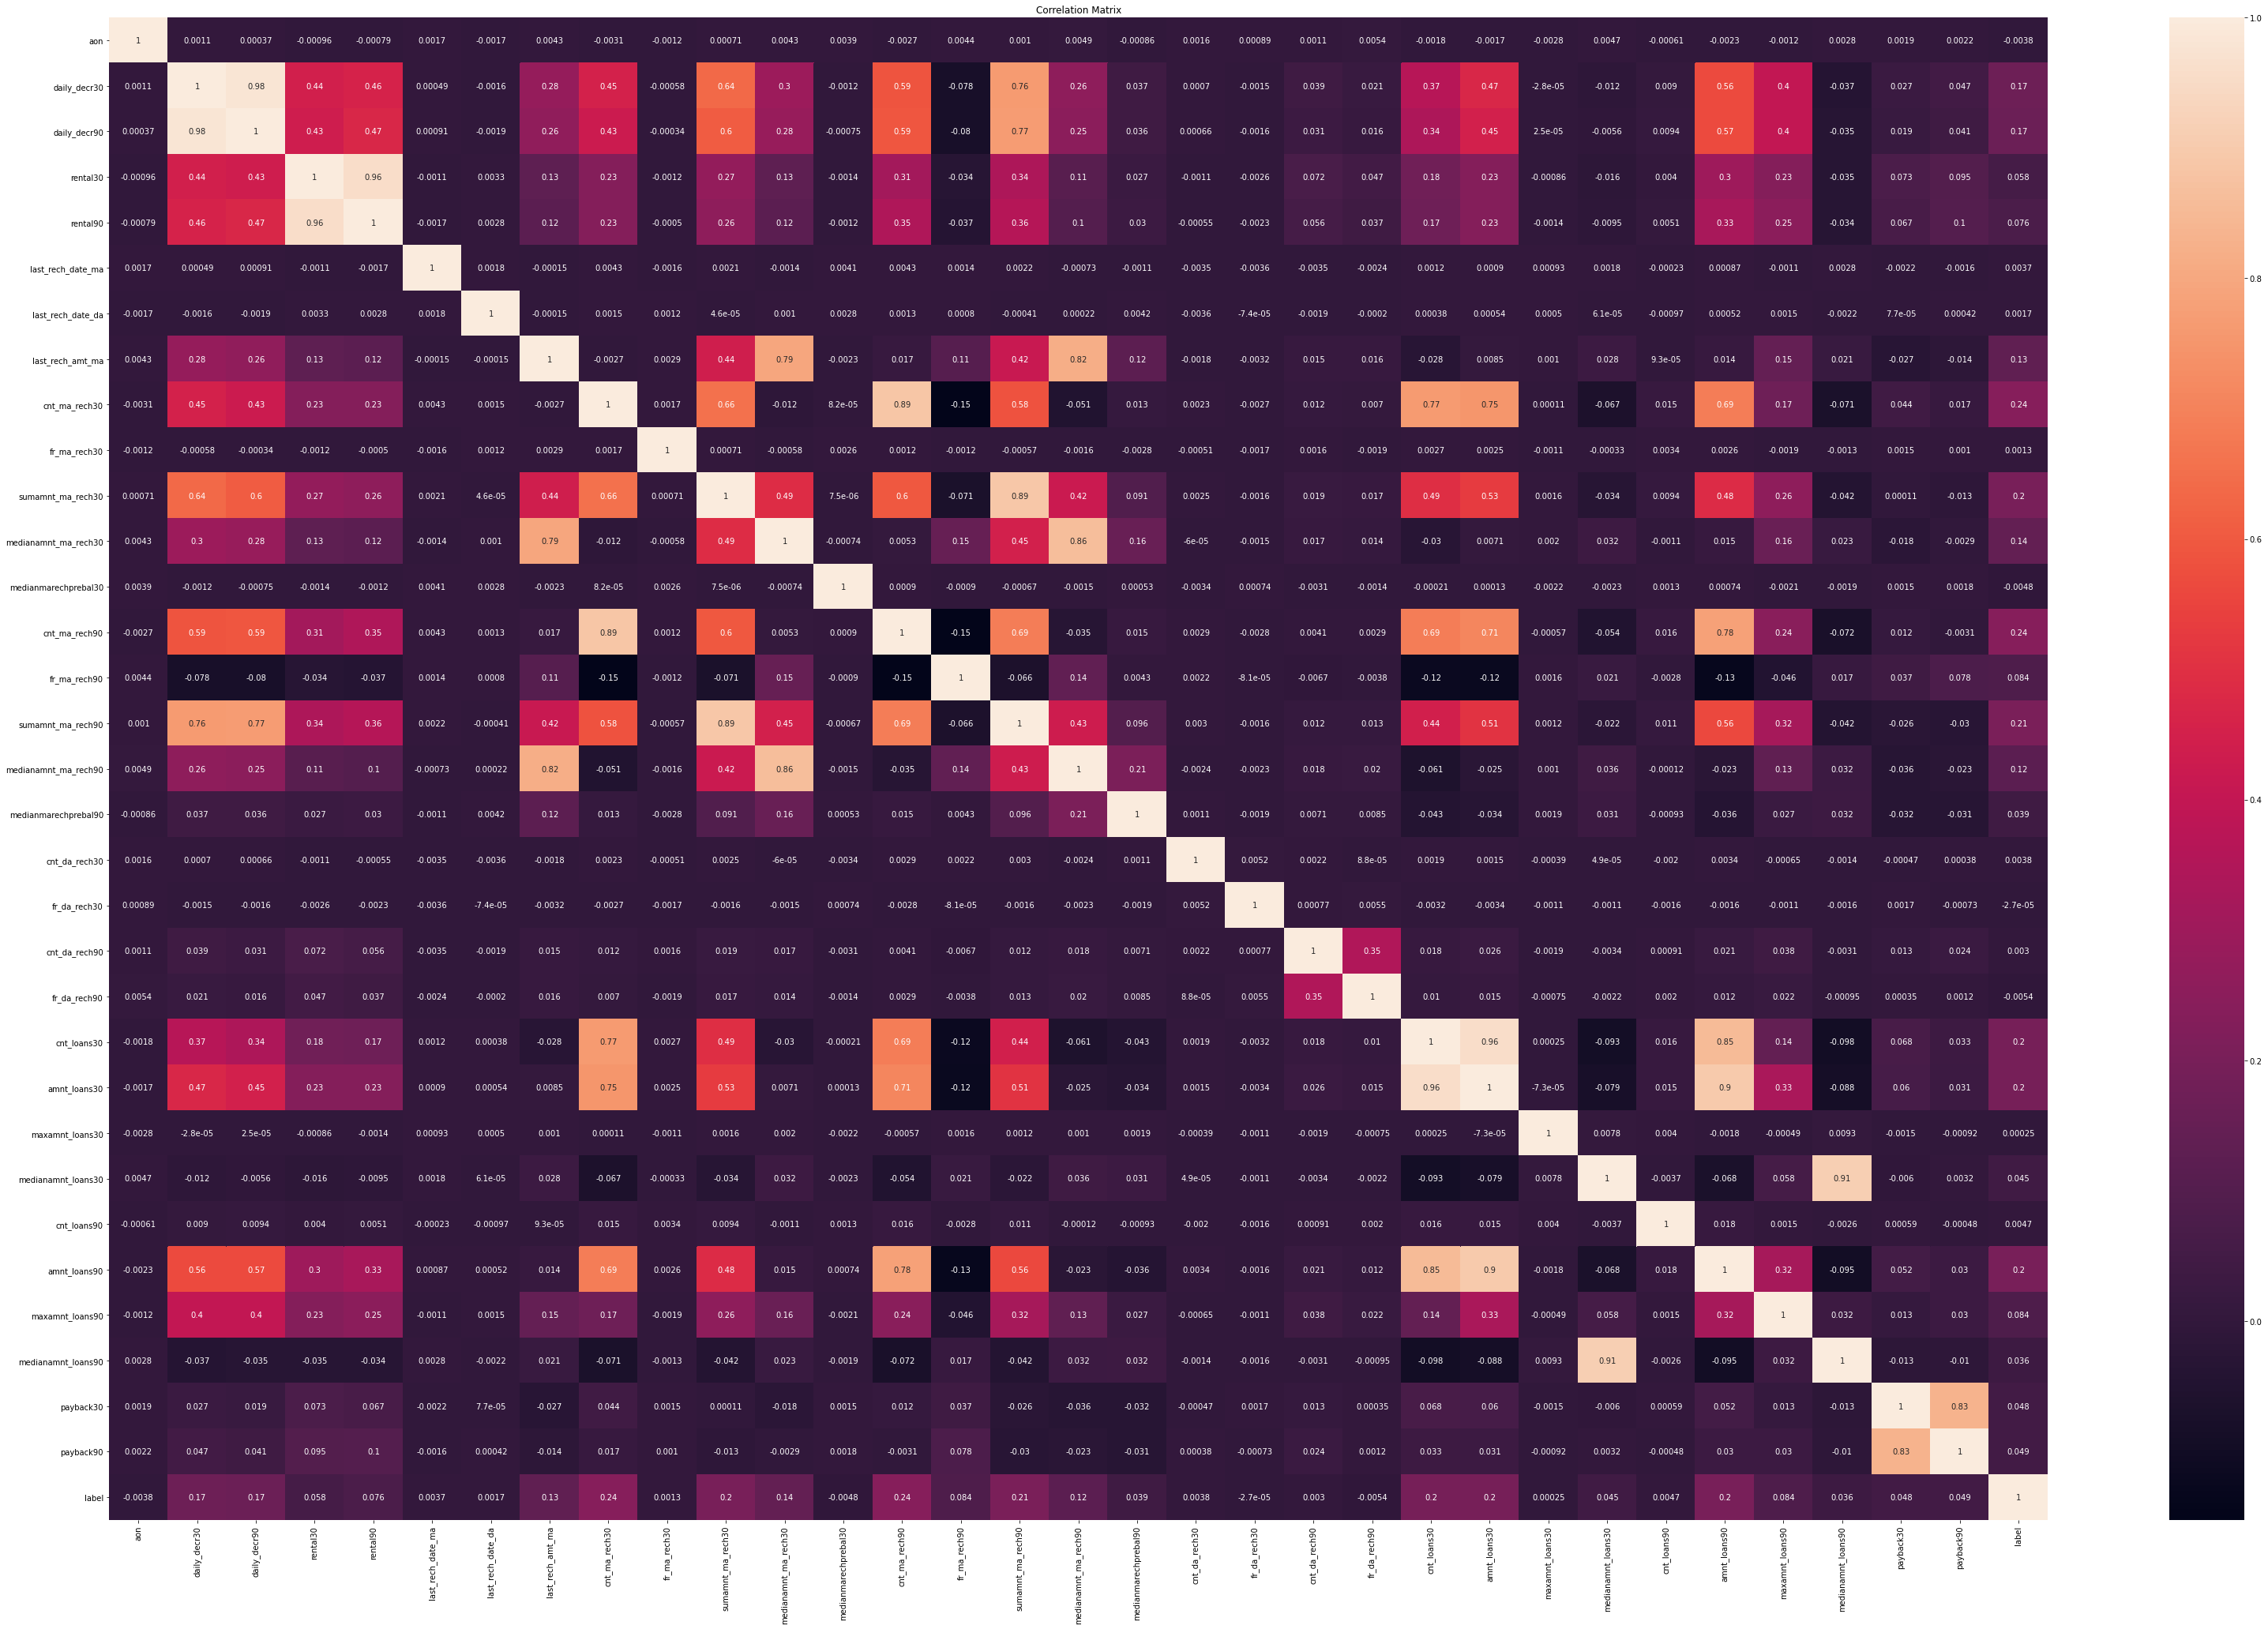

In [27]:
corr_mat=df.corr()
plt.figure(figsize=[55,35])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

# Outcome of Correlation

We can see the positive and negative correlation with the target column.

# Outlier Checking 

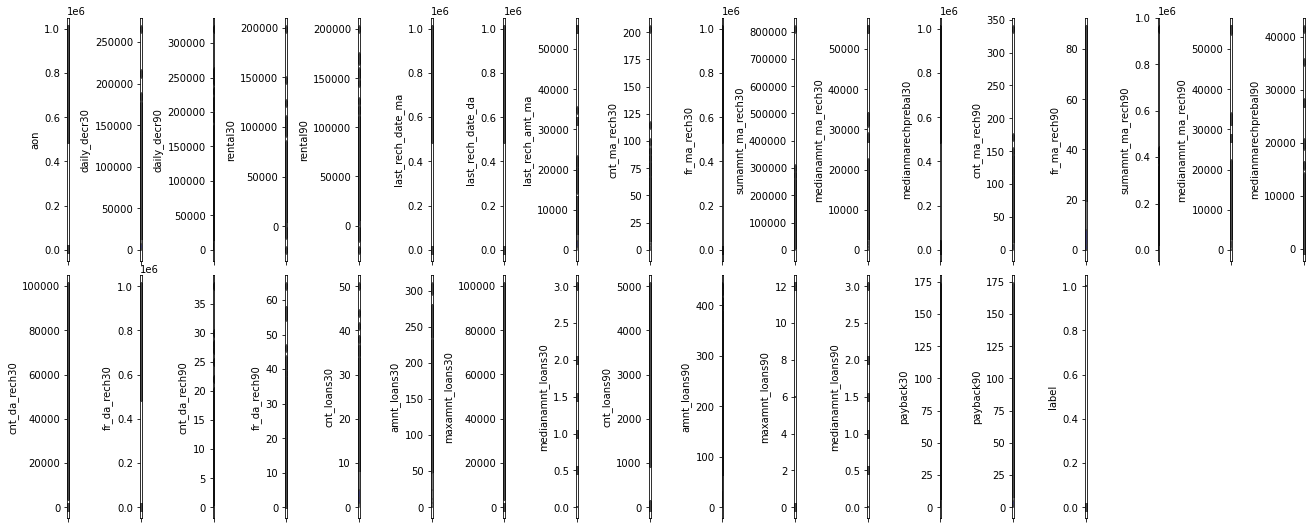

In [31]:
collist=df.columns.values
ncol=18
nrow=10
plt.figure(figsize=(ncol,2*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color='blue',orient='v')
    plt.tight_layout()

In the above - we have a outlier in all the columns. We will remove in the upcoming step

# Checking Skewness

In [32]:
df.skew()

aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans90          1.678304
medianamnt_loa

We can consider the -/+.5 is standard point. Based on that we have skewness here. let me treat in upcoming step

# Data Cleaning

# Removing Outlier

In [14]:
from scipy.stats import zscore
z=np.abs(zscore(DF))
threshold=3
print(np.where(z>3))

(array([     7,     24,     30, ..., 209587, 209587, 209591], dtype=int64), array([20,  3,  5, ..., 25, 29, 20], dtype=int64))


In [15]:
df_new=df[(z<3).all(axis=1)]
print(DF.shape)
print(df_new.shape)

(209593, 33)
(173167, 33)


In [16]:
Loss_percentage=(209593-173167)/209593*100
print(Loss_percentage)

17.379397212693174


In [17]:
x=df_new.iloc[:,:-1]
Y=df_new.iloc[:,-1]

We are spliting the dataset which are X is feature and Y is target.

In [13]:
from sklearn.preprocessing import power_transform
DF=power_transform(X,method='yeo-johnson')
DF

array([[-0.65169095,  0.14548885,  0.08013694, ...,  2.05168818,
         2.01058719, -2.64789583],
       [ 0.06461856,  1.3605718 ,  1.30260351, ..., -0.88685618,
        -0.94952092,  0.37765836],
       [-0.21498893, -0.39130256, -0.42546149, ..., -0.88685618,
        -0.94952092,  0.37765836],
       ...,
       [ 0.51506331,  1.34404431,  1.28910224, ...,  0.92410086,
         0.64176262,  0.37765836],
       [ 1.47379972,  1.38140327,  1.32899765, ..., -0.88685618,
         1.54329724,  0.37765836],
       [ 1.28532432,  0.49966917,  0.42940895, ..., -0.88685618,
        -0.94952092,  0.37765836]])

In [12]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
X=SC.fit_transform(df)
X

array([[-0.10357685, -0.25229941, -0.27634619, ...,  2.9046997 ,
         2.39409346, -2.64789583],
       [-0.09776412,  0.73103667,  0.5533797 , ..., -0.38562959,
        -0.41923266,  0.37765836],
       [-0.10010243, -0.43201111, -0.42903256, ..., -0.38562959,
        -0.41923266,  0.37765836],
       ...,
       [-0.09378769,  0.70079045,  0.53319431, ...,  0.06820893,
        -0.04735622,  0.37765836],
       [-0.08428915,  0.77075515,  0.59455827, ..., -0.38562959,
         0.59938541,  0.37765836],
       [-0.08628398, -0.09674426, -0.14174607, ..., -0.38562959,
        -0.41923266,  0.37765836]])

# Finding the Model and Random State:

I have choosed the logistic Regression because outcome has a two variable. Hence, I am going with classification Model.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range (0,100):
    x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,Y_train)
    predrf=LR.predict(x_test)
    acc = accuracy_score(Y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is",maxAccu*100,"on Random state",maxRS)

Best Accuracy is 87.24759869877384 on Random state 91


I have created the test size for 30% to find the best random state and Accuracy score. Finally, We got 87% accuracy score and Random state is 91.

# Creating Train-Test Split

In [19]:
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=.30,random_state=91)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

LR = LogisticRegression()
LR.fit(x_train,Y_train)
pred=LR.predict(x_test)
print (accuracy_score(Y_test, pred))
print (confusion_matrix(Y_test, pred))
print (classification_report(Y_test, pred))

0.8724759869877384
[[  179  6507]
 [  118 45147]]
              precision    recall  f1-score   support

           0       0.60      0.03      0.05      6686
           1       0.87      1.00      0.93     45265

    accuracy                           0.87     51951
   macro avg       0.74      0.51      0.49     51951
weighted avg       0.84      0.87      0.82     51951



In [21]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train,Y_train)
prid=DT.predict(x_test)
print (accuracy_score(Y_test, prid))
print (confusion_matrix(Y_test, prid))
print (classification_report(Y_test, prid))

0.8602721795538103
[[ 3422  3264]
 [ 3995 41270]]
              precision    recall  f1-score   support

           0       0.46      0.51      0.49      6686
           1       0.93      0.91      0.92     45265

    accuracy                           0.86     51951
   macro avg       0.69      0.71      0.70     51951
weighted avg       0.87      0.86      0.86     51951



In [24]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train,Y_train)
predi=RF.predict(x_test)
print (accuracy_score(Y_test, predi))
print (confusion_matrix(Y_test, predi))
print (classification_report(Y_test, predi))

0.9105888240842333
[[ 3088  3598]
 [ 1047 44218]]
              precision    recall  f1-score   support

           0       0.75      0.46      0.57      6686
           1       0.92      0.98      0.95     45265

    accuracy                           0.91     51951
   macro avg       0.84      0.72      0.76     51951
weighted avg       0.90      0.91      0.90     51951



Random Forest score is - 91%

Decision Tree score is - 86%

Logistic Regression Score is - 87%

We are getting the high accuracy with Random Forest model is 91%. It will be cross check with CV.

# Finding the best CV value:

In [27]:
from sklearn.model_selection import cross_val_score
for j in range (2,5):
    cv_score=cross_val_score(RF,x,Y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At score fold {j} is having the CV_Score is {cv_mean*100}")

At score fold 2 is having the CV_Score is 90.89260682213187
At score fold 3 is having the CV_Score is 90.90473420054109
At score fold 4 is having the CV_Score is 90.9370724584202


Based on the above high score of Loistic Regression. I have runned with LR to find best cv value. Here, I choosed cv=4 is best. Hence. will check the cross validation other model.

In [28]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(LR,x,Y,cv=4)
scr=cross_val_score(DT,x,Y,cv=4)
sc=cross_val_score(RF,x,Y,cv=4)
print("Cross Validation Score of LR :",score.mean()*100)
print("Cross Validation Score of DT :",scr.mean()*100)
print("Cross Validation Score of RF :",sc.mean()*100)

Cross Validation Score of LR : 86.83640669679194
Cross Validation Score of DT : 86.09608159771838
Cross Validation Score of RF : 90.9411142021153


Minimum Difference in accuracy and cross_validation score is for RF is (0%). So, this is best model

# AUC ROC Curve:

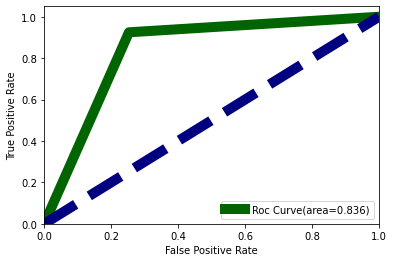

In [30]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(predi,Y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color="darkgreen",lw=10,label='Roc Curve(area=%0.3f)'%roc_auc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# Hyper Parameter Tuning

In [33]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': np.arange(2,15),
             'criterion':['gini','entropy']}
GCV=GridSearchCV(RF,parameters,cv=4)
GCV.fit(x_train,Y_train)
print(GCV.best_params_)

{'criterion': 'gini', 'max_depth': 14}


In [34]:
RF=RandomForestClassifier(criterion="gini",max_depth=14)
RF.fit(x_train,Y_train)
RF.score(x_train,Y_train)
predict=RF.predict(x_test)
AC=accuracy_score(Y_test,predict)
print("Random Forest Score :",AC*100)

cv_score=cross_val_score(RF,x,Y,cv=4)
cv_mean=cv_score.mean()
print("CV Score :",cv_mean*100)

Random Forest Score : 91.18592519874497
CV Score : 90.94400225191318


# Model Saving

In [35]:
import pickle
filename='Micro_credit.pkl'
pickle.dump(RF,open(filename,'wb'))

# Conclusion

In [36]:
Loaded_load = pickle.load(open('Micro_credit.pkl','rb'))
Result=Loaded_load.score(x_test,Y_test)
print(Result)

0.9118592519874497


In [37]:
Conclusion=pd.DataFrame([Loaded_load.predict(x_test)[:],predict[:]],index=["Predicted","Original"])
Conclusion

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  \
Predicted  1  1  1  1  1  1  1  1  1  1   1   1   1   1   1   0   1   1   1   
Original   1  1  1  1  1  1  1  1  1  1   1   1   1   1   1   0   1   1   1   

           19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  \
Predicted   1   1   1   1   1   1   1   1   1   1   0   1   1   1   1   1   1   
Original    1   1   1   1   1   1   1   1   1   1   0   1   1   1   1   1   1   

           36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  \
Predicted   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   
Original    1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   

           53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  \
Predicted   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   
Original    1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   

           70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  \
Predicted   0   1   1   1   1   1   1   0   0   1   1   1   1   1   0   1   1   
Original    0   1   1   1   1   1   1   0   0   1   1   1   1   1   0   1   1   

           87  88  89  90  91  92  93  94  95  96  97  98  99  100  101  102  \
Predicted   1   1   1   1   1   1   1   1   1   1   1   1   1    1    0    1   
Original    1   1   1   1   1   1   1   1   1   1   1   1   1    1    0    1   

           103  104  105  106  107  108  109  110  111  112  113  114  115  \
Predicted    1    1    1    1    0    1    1    1    1    1    1    1    1   
Original     1    1    1    1    0    1    1    1    1    1    1    1    1   

           116  117  118  119  120  121  122  123  124  125  126  127  128  \
Predicted    1    1    1    1    1    1    1    1    1    1    0    1    1   
Original     1    1    1    1    1    1    1    1    1    1    0    1    1   

           129  130  131  132  133  134  135  136  137  138  139  140  141  \
Predicted    1    1    1    1    1    0    1    1    1    0    1    1    1   
Original     1    1    1    1    1    0    1    1    1    0    1    1    1   

           142  143  144  145  146  147  148  149  150  151  152  153  154  \
Predicted    1    1    1    1    1    1    0    1    1    1    1    0    1   
Original     1    1    1    1    1    1    0    1    1    1    1    0    1   

           155  156  157  158  159  160  161  162  163  164  165  166  167  \
Predicted    1    1    1    1    1    1    1    0    1    1    1    1    1   
Original     1    1    1    1    1    1    1    0    1    1    1    1    1   

           168  169  170  171  172  173  174  175  176  177  178  179  180  \
Predicted    1    1    1    0    1    1    1    1    1    1    1    1    1   
Original     1    1    1    0    1    1    1    1    1    1    1    1    1   

           181  182  183  184  185  186  187  188  189  190  191  192  193  \
Predicted    1    1    1    1    1    1    1    1    1    1    0    1    1   
Original     1    1    1    1    1    1    1    1    1    1    0    1    1   

           194  195  196  197  198  199  200  201  202  203  204  205  206  \
Predicted    1    1    1    1    1    1    0    1    1    1    1    1    1   
Original     1    1    1    1    1    1    0    1    1    1    1    1    1   

           207  208  209  210  211  212  213  214  215  216  217  218  219  \
Predicted    1    1    1    1    1    1    1    1    1    1    1    1    1   
Original     1    1    1    1    1    1    1    1    1    1    1    1    1   

           220  221  222  223  224  225  226  227  228  229  230  231  232  \
Predicted    0    1    1    1    1    1    1    1    1    1    1    1    1   
Original     0    1    1    1    1    1    1    1    1    1    1    1    1   

           233  234  235  236  237  238  239  240  241  242  243  244  245  \
Predicted    1    1    1    1    1    1    1    1    1    1    1    1    1   
Original     1    1    1    1    1    1    1    1 

We have a the outcome for this model with 91%(rounded Off) score.